In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import pandas as pd

1\. PCA on 3D dataset

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [2]:
N = 1000
mean = 0
std_1 = 1
std_2 = 2
p = 3

x1 = np.random.normal(mean, std_1, N)
x2 = x1 + np.random.normal(mean, std_2, N)
x3 = 2*x1 + x2
mat = np.array([x1,x2,x3])

In [3]:
#covarianc matrix   
mat_cov = np.cov(mat)
l, V = la.eig(mat_cov)
idx = np.argsort(l)[::-1]
l = l[idx]
V = V[:, idx]

print(f'Matrix eigenvalues are \n{np.real_if_close(l)} \n')
print(f'The matrix of eigenvectors is \n{V}')

Matrix eigenvalues are 
[ 1.64184155e+01  1.37628856e+00 -1.35862858e-15] 

The matrix of eigenvectors is 
[[-0.193144    0.54408522 -0.81649658]
 [-0.47322159 -0.78063734 -0.40824829]
 [-0.85950958  0.3075331   0.40824829]]


In [4]:
U, S, Vt = la.svd(mat)
eigenvalues = S**2 / (N-1)

print(f'Matrix eigenvalues are \n{np.real_if_close(eigenvalues)} \n')
print(f'The matrix of eigenvectors is \n{U}')

Matrix eigenvalues are 
[1.64236679e+01 1.37630248e+00 2.44018171e-32] 

The matrix of eigenvectors is 
[[-0.19315378  0.54408175 -0.81649658]
 [-0.47320756 -0.78064585 -0.40824829]
 [-0.85951511  0.30751765  0.40824829]]


In [5]:
Lambda = np.diag(l)
trace = Lambda.trace()

for i in range(p):
    variability = abs(Lambda[i,i]/trace)
    print(f'By selecting component {i}, we retain {round(variability*100,2)} % of the total variability')

for i in range(p):
    for j in range(i,p):
        if i != j:
            variability = abs((Lambda[i,i]+Lambda[j,j])/trace)
            print(f'Selecting component ({i}, {j}), we retain {round(variability*100,2)} % of the total variability')
        


By selecting component 0, we retain 92.27 % of the total variability
By selecting component 1, we retain 7.73 % of the total variability
By selecting component 2, we retain 0.0 % of the total variability
Selecting component (0, 1), we retain 100.0 % of the total variability
Selecting component (0, 2), we retain 92.27 % of the total variability
Selecting component (1, 2), we retain 7.73 % of the total variability


In [6]:
# matrix ridefinition
Xp = np.dot(U.T, mat)

Text(0.5, 1, 'New basis')

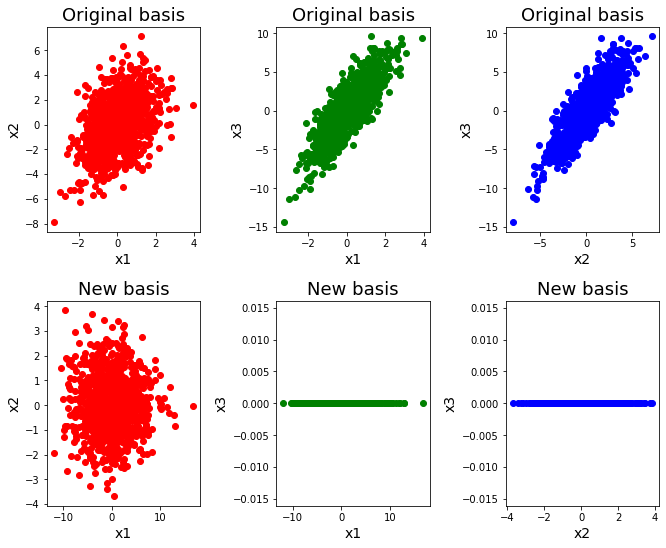

In [7]:
# plot
fig, axe = plt.subplots(2, 3, figsize = (10,8))

axe[0,0].scatter(mat[0], mat[1], color = 'red')
axe[0,0].set_xlabel('x1', fontsize = 14)
axe[0,0].set_ylabel('x2', fontsize = 14)
axe[0,0].set_title('Original basis', fontsize = 18)

axe[0,1].scatter(mat[0], mat[2], color = 'green')
axe[0,1].set_xlabel('x1', fontsize = 14)
axe[0,1].set_ylabel('x3', fontsize = 14)
axe[0,1].set_title('Original basis', fontsize = 18)

axe[0,2].scatter(mat[1], mat[2], color = 'blue')
axe[0,2].set_xlabel('x2', fontsize = 14)
axe[0,2].set_ylabel('x3', fontsize = 14)
axe[0,2].set_title('Original basis', fontsize = 18)

fig.tight_layout(pad=3.0)

axe[1,0].scatter(Xp[0], Xp[1], color = 'red')
axe[1,0].set_xlabel('x1', fontsize = 14)
axe[1,0].set_ylabel('x2', fontsize = 14)
axe[1,0].set_title('New basis', fontsize = 18)

axe[1,1].scatter(Xp[0], Xp[2], color = 'green')
axe[1,1].set_xlabel('x1', fontsize = 14)
axe[1,1].set_ylabel('x3', fontsize = 14)
axe[1,1].set_title('New basis', fontsize = 18)

axe[1,2].scatter(Xp[1], Xp[2], color = 'blue')
axe[1,2].set_xlabel('x2', fontsize = 14)
axe[1,2].set_ylabel('x3', fontsize = 14)
axe[1,2].set_title('New basis', fontsize = 18)

2\. PCA on a nD dataset

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [8]:
# new dataset
noise = np.array([np.random.normal(mean, np.random.uniform(1,3)/20, N) for x in range(10)])
mat_new = [mat, noise]
mat_new = np.stack([item for sublist in mat_new for item in sublist])

In [9]:
# covariance matrix
mat_cov = np.cov(mat_new)
l, V = la.eig(mat_cov)
idx = np.argsort(l)[::-1]
l = l[idx]
V = V[:, idx]

print(f'Matrix eigenvalues are \n{np.real_if_close(l)} \n')
print(f'The matrix of eigenvectors is \n{V}')

Matrix eigenvalues are 
[ 1.64185192e+01  1.37641488e+00  1.82619700e-02  1.69255038e-02
  1.44522959e-02  1.36825883e-02  1.18018130e-02  1.16125591e-02
  7.29586033e-03  7.13314645e-03  5.47376226e-03  3.85324518e-03
 -5.34294831e-16] 

The matrix of eigenvectors is 
[[-1.93142821e-01  5.44062463e-01  1.50525356e-03  1.02409781e-03
   1.27508472e-03  1.00176907e-03  2.80339839e-03 -2.03399290e-03
   2.30714594e-03  2.89464194e-04 -3.04983218e-05  1.36822512e-03
   8.16496581e-01]
 [-4.73220905e-01 -7.80595294e-01 -2.75639457e-03 -5.16970967e-04
  -2.13609506e-03 -1.89254916e-03 -4.88311253e-03  3.79886744e-03
  -3.11562850e-03 -4.83690490e-04  3.70087363e-04 -1.38960793e-03
   4.08248290e-01]
 [-8.59506547e-01  3.07529633e-01  2.54112543e-04  1.53122464e-03
   4.14074383e-04  1.10988987e-04  7.23684241e-04 -2.69118360e-04
   1.49866338e-03  9.52378978e-05  3.09090719e-04  1.34684232e-03
  -4.08248290e-01]
 [ 2.39109289e-04  2.09837049e-03 -1.76272292e-01 -7.05513165e-02
  -7.70425858

In [10]:
#svd
U, S, Vt = la.svd(mat_new)
eigenvalues = S**2/(N-1)

print(f'Matrix eigenvalues are \n {eigenvalues}\n')
print(f'The matrix of eigenvectors is \n{U}')

Matrix eigenvalues are 
 [1.64237702e+01 1.37642912e+00 1.82735310e-02 1.69277971e-02
 1.44576254e-02 1.36885061e-02 1.18381293e-02 1.16219290e-02
 7.29732997e-03 7.13728410e-03 5.47608156e-03 3.85776197e-03
 2.30320136e-32]

The matrix of eigenvectors is 
[[-1.93152617e-01  5.44058892e-01  1.48478788e-03 -1.00514997e-03
   1.31204544e-03 -1.03097279e-03  2.98097316e-03 -1.77201813e-03
   2.31401579e-03  2.58192250e-04 -2.71201939e-05  1.36897828e-03
   8.16496581e-01]
 [-4.73206883e-01 -7.80603792e-01 -2.72946359e-03  4.89438940e-04
  -2.19107045e-03  1.93369509e-03 -5.18778583e-03  3.32886833e-03
  -3.13386544e-03 -4.53798968e-04  3.73683451e-04 -1.38182534e-03
   4.08248290e-01]
 [-8.59512117e-01  3.07513993e-01  2.40112177e-04 -1.52086100e-03
   4.33020428e-04 -1.28250486e-04  7.74160492e-04 -2.15167934e-04
   1.49416614e-03  6.25855318e-05  3.19443064e-04  1.35613122e-03
  -4.08248290e-01]
 [ 2.38127112e-04  2.09896381e-03 -1.75673627e-01  6.92600010e-02
  -7.67177851e-01 -5.94544

In [11]:
Lambda = np.diag(l)
trace = Lambda.trace()

variability = abs((Lambda[0,0]+Lambda[1,1])/trace)
print(f'Selecting component (0,1), we retain {round(variability*100,2)} % of the total variability')

Selecting component (0,1), we retain 99.38 % of the total variability


In [12]:
print('The retained variability in the two esxample is very similar.')
print('In both cases it is higher than 99%')

The retained variability in the two esxample is very similar.
In both cases it is higher than 99%


3\. **Optional**: PCA on the MAGIC dataset

Perform a PCA on the magic04.data dataset.

In [13]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [14]:
data = pd.read_csv('data/magic04.data', sep = ',', header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [15]:
data.drop(10, inplace=True, axis=1)

In [16]:
#svd
U, S, Vt = la.svd(data)
eigenvalues = S**2/(N-1)

print(f'Matrix eigenvalues are \n {eigenvalues}\n')
print(f'The matrix of eigenvectors is \n{U}')

Matrix eigenvalues are 
 [9.08893837e+05 7.99323694e+04 3.96852872e+04 2.54845661e+04
 1.56386050e+04 8.25616830e+03 2.23434645e+03 1.07395581e+01
 6.63578096e-01 8.04616735e-03]

The matrix of eigenvectors is 
[[-3.03239936e-03 -3.58932705e-03  8.45817849e-04 ... -8.20996315e-03
  -1.28599398e-02 -1.97295965e-02]
 [-6.80776740e-03 -4.93168598e-03  8.93506042e-04 ...  1.12988341e-02
   1.79290324e-02 -1.18726695e-02]
 [-1.00144095e-02 -3.78153851e-03  2.13679760e-02 ... -3.87890932e-04
  -8.99605080e-03 -1.28865116e-02]
 ...
 [-9.10740061e-03 -1.62275473e-03 -3.51827734e-03 ...  9.99671590e-01
  -4.27057217e-04  1.39714689e-04]
 [-1.43559247e-02  4.78057046e-03  1.80811955e-02 ... -4.37283224e-04
   9.97991209e-01 -7.82847471e-05]
 [-1.06045893e-02  2.77433781e-02  1.12912403e-02 ...  1.37450466e-04
  -9.91712402e-05  9.98563967e-01]]


In [17]:
Lambda = np.diag(eigenvalues)
trace = Lambda.trace()

In [18]:
variability = abs((Lambda[0,0]+Lambda[1,1])/trace)
print(f'Selecting component (0,1), we retain {round(variability*100,2)} % of the total variability')

Selecting component (0,1), we retain 91.55 % of the total variability


In [19]:
print('In this case, if we select the same component of theprevious cases we retain a total variability smaller than 99%')

In this case, if we select the same component of theprevious cases we retain a total variability smaller than 99%
